<a href="https://colab.research.google.com/github/kraditya16/Calculator/blob/main/Copy_of_MIT2019072_SOC2020_PCA_faceRecog_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#python library to plot the images.
from matplotlib import pyplot as plt

#python library to read images
from matplotlib.image import imread
import numpy as np

#python package to perform the basic linux command to read data from folder
import os

In [ ]:
#changing directory to Images folder in order to read the images
os.chdir('Images')

#List is used to store the names of the images
image_names = []

#Reading the images present in the folder and fetches the names of the images
for f in os.listdir():
    f_name, f_ext = os.path.splitext(f)
    image_names.append(f)

#Sorting the names of the images in the alphabetical order
#image_names = sorted(image_names)


In [ ]:
#checking the current working directory
!pwd

/content/Images


In [ ]:
# changing the current working directory to content/
os.chdir('..')

/content


(243, 320)


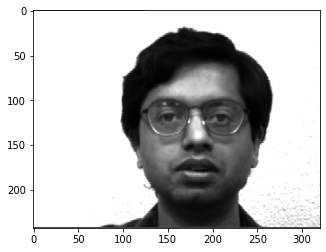

In [ ]:
#setting the path to the images
dataset_path = 'Images/'

#setting the directory name
dataset_dir  = os.listdir(dataset_path)

#Checking the images by plotting one of the random image
img_array1 = plt.imread('Images/subject10.glasses')
print(img_array1.shape)
plt.imshow(img_array1, cmap='gray')
plt.show()

#The height and weight of the image is fixed
width  = 243
height = 320


In [ ]:
#Total number of the images present in the directory
len(image_names)

165

In [ ]:
#Splitting the dataset into 6:4 ratio.
train_image_names = image_names[0:110]

#Defining an array to store the training data.
training_tensor   = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

#flattening the matrix into a single row. Each row corresponds to a single face
for i in range(len(train_image_names)):
    img = plt.imread(dataset_path + train_image_names[i])
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()


#40% of the input data goes as testing data
test_image_names = image_names[110:165]

#Defining the array for the testing data
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

#flattening the matrix into a single row. Each row corresponds to a single face
for i in range(len(test_image_names)):
    img = imread(dataset_path + test_image_names[i])
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()

#printing the train and test image names
print(train_image_names)
print(test_image_names)

['subject12.wink', 'subject09.noglasses', 'subject14.glasses', 'subject04.sad', 'subject01.surprised', 'subject08.rightlight', 'subject12.sleepy', 'subject03.leftlight', 'subject02.surprised', 'subject14.leftlight', 'subject15.noglasses', 'subject03.sad', 'subject07.noglasses', 'subject09.happy', 'subject05.surprised', 'subject07.surprised', 'subject11.sad', 'subject10.noglasses', 'subject06.sleepy', 'subject08.normal', 'subject08.sleepy', 'subject01.leftlight', 'subject10.wink', 'subject10.glasses', 'subject05.normal', 'subject04.sleepy', 'subject04.happy', 'subject07.wink', 'subject05.glasses', 'subject03.glasses', 'subject05.sad', 'subject09.normal', 'subject10.normal', 'subject04.wink', 'subject15.surprised', 'subject15.glasses', 'subject03.sleepy', 'subject13.normal', 'subject02.sad', 'subject12.surprised', 'subject11.normal', 'subject10.happy', 'subject02.noglasses', 'subject04.normal', 'subject11.noglasses', 'subject09.rightlight', 'subject06.happy', 'subject14.noglasses', 'subj

In [ ]:
print("Training data shape : {} ".format(training_tensor.shape))
print("Testing data shape : {} ".format(testing_tensor.shape))

Training data shape : (110, 77760) 
Testing data shape : (55, 77760) 


In [ ]:
mean_face = np.zeros((1,height*width))

#calculating the total sum of each class
for i in training_tensor:
    mean_face = np.add(mean_face,i)

#dividing the sum by total in order to find the mean
mean_face = np.divide(mean_face,float(len(train_image_names))).flatten()


In [ ]:

normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))

#subtracting the data points from their mean value in order to find the normalized vector
for i in range(len(train_image_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

In [ ]:
#calculating the co-variance matrix
cov_matrix = np.cov(normalised_training_tensor)

#As it is a gray scale image of 8-bits so dividing by 8
cov_matrix = np.divide(cov_matrix,8.0)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 340.55928892  -81.70021932 -250.11713374 ... -151.39202777
  -124.45580431 -272.24053101]
 [ -81.70021932  372.98238182  154.09746776 ...   -2.27324007
    96.61200118  103.42109964]
 [-250.11713374  154.09746776  799.90356352 ...  260.50784265
    36.95634939  627.13567246]
 ...
 [-151.39202777   -2.27324007  260.50784265 ...  603.64089115
   -53.73904221  501.31985141]
 [-124.45580431   96.61200118   36.95634939 ...  -53.73904221
   334.42596949  -52.87120593]
 [-272.24053101  103.42109964  627.13567246 ...  501.31985141
   -52.87120593 1296.41857986]]


In [ ]:
#calculating the eigen values
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-8.45600523e-02+0.j  4.23358920e-02+0.j  4.10860056e-02+0.j ...
   1.10630156e-01+0.j  1.31025330e-03+0.j -9.80893869e-05+0.j]
 [ 5.33139480e-02+0.j -6.77580226e-02+0.j -9.50520046e-02+0.j ...
  -2.34020365e-02+0.j -6.89282393e-03+0.j -1.98185246e-01+0.j]
 [ 1.57167425e-01+0.j  6.07144644e-02+0.j -1.40403713e-01+0.j ...
  -3.96831653e-02+0.j  5.11266856e-01+0.j -8.61849613e-04+0.j]
 ...
 [ 1.17862878e-01+0.j  6.47619037e-02+0.j  1.64237382e-01+0.j ...
  -9.26410940e-02+0.j -1.54867359e-01+0.j -2.26788189e-02+0.j]
 [ 3.14708250e-02+0.j -1.45957704e-01+0.j -4.09946151e-02+0.j ...
   9.01249912e-02+0.j -1.08003753e-01+0.j  3.36183370e-02+0.j]
 [ 2.14883415e-01+0.j  2.00646486e-01+0.j  7.36051873e-03+0.j ...
   1.32595012e-01+0.j -4.79648642e-03+0.j  1.84922981e-01+0.j]]

Eigenvalues of Cov(X): 
[ 1.87325246e+04+0.00000000e+00j  6.77340716e+03+0.00000000e+00j
  4.61471725e+03+0.00000000e+00j  2.82619892e+03+0.00000000e+00j
  2.45167456e+03+0.00000000e+00j  1.8352

In [ ]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sorting the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [ ]:
#picking the 10 principle components
reduced_data = np.array(eigvectors_sort[:10]).transpose()
reduced_data.shape

(110, 10)

In [ ]:

print(training_tensor.shape)

# finding the projected data by doing dot product with reduced data and traning data
proj_data = training_tensor.T@reduced_data
proj_data = proj_data.T
proj_data.shape

(110, 77760)


(10, 77760)

In [ ]:
print(normalised_training_tensor.shape)

#calculating the weight matrix
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
w.shape

(110, 77760)


(110, 10)

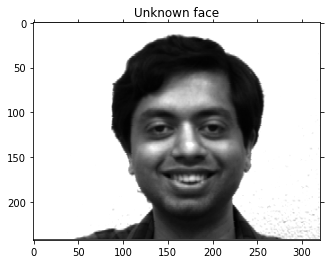

In [ ]:
#testing for any face data taken at random
test_face        = plt.imread('Images/subject10.happy')
test_face_vector = np.array(test_face, dtype='float64').flatten()

plt.imshow(test_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [ ]:
#Normalizing and finding the weight matrix
normalised_uface_vector = np.subtract(test_face_vector,mean_face)
w_test = np.dot(proj_data, normalised_uface_vector)
w_test

array([-5.67507931e+07+0.j, -5.89020694e+08+0.j,  1.02614710e+08+0.j,
       -1.00144547e+08+0.j, -2.19193491e+08+0.j, -6.48804007e+07+0.j,
       -5.96796354e+07+0.j,  1.18488194e+08+0.j, -7.38526406e+07+0.j,
       -2.09888275e+07+0.j])

In [ ]:
#calculating the distance matrix between weights
diff  = w - w_test
norms = np.linalg.norm(diff, axis=1)

#finding the min difference between the weight matrix.The correspnding index is returned using argmin command
index = np.argmin(norms)

print(norms)
min(norms)

[1.23103799e+09 9.45193285e+08 2.15917665e+09 1.32500123e+09
 9.56992003e+08 1.61682057e+09 7.72045212e+08 2.28283164e+09
 1.54851837e+09 1.31227403e+09 5.84714588e+08 6.07466095e+08
 6.56702050e+08 9.42988202e+08 1.15840039e+09 8.57538388e+08
 1.42834475e+09 5.93679853e+07 2.91660968e+09 7.10372463e+08
 9.81885193e+08 2.27709990e+09 7.57594048e+07 7.20695892e+08
 1.07142466e+09 1.28139977e+09 1.21392890e+09 8.00748451e+08
 1.09416852e+09 5.01671013e+08 1.04092912e+09 9.45193285e+08
 2.20025909e+08 1.14177419e+09 5.71603425e+08 3.38166381e+08
 6.56343957e+08 1.03485654e+09 1.63942972e+09 1.22963324e+09
 1.36461221e+09 0.00000000e+00 1.64068097e+09 1.32500123e+09
 9.25709085e+08 1.93183420e+09 2.83144363e+09 1.92071300e+09
 1.28901733e+09 7.32331087e+08 2.05899143e+09 2.00629179e+09
 2.18048608e+09 9.37349494e+08 9.66818994e+08 7.61308746e+08
 5.59482615e+08 1.07526903e+09 1.77789853e+09 1.49786563e+09
 2.02569462e+09 1.81132281e+09 2.26225180e+08 3.12901098e+09
 2.34050483e+09 8.383383

0.0

41
subject10.happy


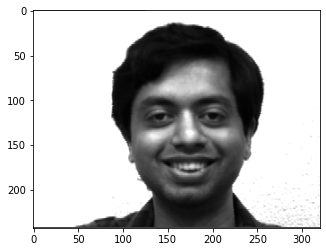

In [ ]:

print(index)
print(train_image_names[index])

#the image corresponding to the image is shown which exactly matches with it
plt.imshow(imread('Images/'+train_image_names[index]), cmap='gray')

In [ ]:
!pwd

/content


In [ ]:
#testing the PCA algo with the test data

count = 0
i = 0
validation = []
for name in test_image_names:
  unknown_face        = plt.imread('Images/'+name)
  print("Unknown face : "+name.split('.')[0])
  unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
  normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
  w_unknown = np.dot(proj_data, normalised_uface_vector)
  diff  = w - w_unknown
  norms = np.linalg.norm(diff, axis=1)
  index = np.argmin(norms)
  print("Recognised face : "+image_names[index].split('.')[0])
  if image_names[index].split('.')[0] == name.split('.')[0]:
        count = count + 1
        validation.append(1)
  else:
        validation.append(0)
  i = i+1

Unknown face : subject13
Recognised face : subject09
Unknown face : subject14
Recognised face : subject14
Unknown face : subject14
Recognised face : subject14
Unknown face : subject13
Recognised face : subject09
Unknown face : subject05
Recognised face : subject05
Unknown face : subject01
Recognised face : subject01
Unknown face : subject07
Recognised face : subject07
Unknown face : subject10
Recognised face : subject10
Unknown face : subject02
Recognised face : subject10
Unknown face : subject07
Recognised face : subject15
Unknown face : subject10
Recognised face : subject04
Unknown face : subject12
Recognised face : subject05
Unknown face : subject08
Recognised face : subject08
Unknown face : subject02
Recognised face : subject02
Unknown face : subject15
Recognised face : subject15
Unknown face : subject09
Recognised face : subject09
Unknown face : subject01
Recognised face : subject01
Unknown face : subject09
Recognised face : subject09
Unknown face : subject12
Recognised face : sub

In [ ]:
#Accuracy obtained
print(count*100/i)

74.54545454545455


In [ ]:
#valdation represents where the faces matches in form of 1 and 0. If matches then 1 else 0.
print(validation)

[0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1]
